# Keras
- 순차형 모델 from https://keras.io/guides/sequential_model/
- 함수형 API from https://keras.io/guides/functional_api/
- 서브클래싱 from https://keras.io/guides/making_new_layers_and_models_via_subclassing/

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/swkim01/DSAC4/blob/main/gg-59-Keras.ipynb"><img src="https://github.com/swkim01/DSAC4/raw/main/colab_logo_32px.png" />구글 코랩에서 실행</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/swkim01/DSAC4/blob/main/gg-59-Keras.ipynb"><img src="https://github.com/swkim01/DSAC4/raw/main/GitHub-Mark-32px.png" />깃헙에서 소스 보기</a>
  </td>
</table>

# 순차형 모델

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2020/04/12<br>
**Last modified:** 2020/04/12<br>
**Description:** Complete guide to the Sequential model.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

- `순차형(Sequential)` 모델은 **정확하게 하나의 입력 텐서와 하나의 출력 텐서**를 가진 각 계층이 **순차적으로 쌓인 계층들**에 적합하다.

In [2]:
# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)
# Call model on a test input
x = tf.ones((3, 3))
y = model(x)

은 다음과 같다.

In [3]:
# Create 3 layers
layer1 = layers.Dense(2, activation="relu", name="layer1")
layer2 = layers.Dense(3, activation="relu", name="layer2")
layer3 = layers.Dense(4, name="layer3")

# Call layers on a test input
x = tf.ones((3, 3))
y = layer3(layer2(layer1(x)))

순차형 모델은 Sequential 생성자로 계층 리스트를 전달하여 생성 가능

In [4]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
)

In [5]:
model.layers

또한 순차형 모델은 `add()`  메소드를 사용하여 점차 크게 하면서 생성 가능

In [6]:
model = keras.Sequential()
model.add(layers.Dense(2, activation="relu"))
model.add(layers.Dense(3, activation="relu"))
model.add(layers.Dense(4))

데이터를 입력할 때 내부 모델이 구축되고 가중치(weight)가 생성됨

In [9]:
x = tf.ones((1, 4))
y = model(x)

모델이 구축되면, `summary()` 메소드를 호출하여 내용 출력 가능

In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (1, 2)                    10        
_________________________________________________________________
dense_4 (Dense)              (1, 3)                    9         
_________________________________________________________________
dense_5 (Dense)              (1, 4)                    16        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


# More Examples
- https://machinelearningmastery.com/how-to-make-classification-and-regression-predictions-for-deep-learning-models-in-keras/

## Classification

In [11]:
# example of training a final classification model
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
# define and fit the final model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X, y, epochs=200, verbose=0)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


- prediction: two types
  - class prediction
  - probability prediction

In [12]:
# new instances where we do not know the answer
Xnew, _ = make_blobs(n_samples=3, centers=2, n_features=2, random_state=1)
Xnew = scaler.transform(Xnew)

# make a prediction for probability
print('Probability...')
ynew = model.predict(Xnew)
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

Probability...
X=[0.89337759 0.65864154], Predicted=[0.07768377]
X=[0.29097707 0.12978982], Predicted=[0.88698477]
X=[0.78082614 0.75391697], Predicted=[0.06723167]


In [13]:
# make a prediction for classes
ynew = (model.predict(Xnew) > 0.5).astype("int32")
# show the inputs and predicted outputs
print('Classes...')
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

Classes...
X=[0.89337759 0.65864154], Predicted=[0]
X=[0.29097707 0.12978982], Predicted=[1]
X=[0.78082614 0.75391697], Predicted=[0]


## Regression

In [14]:
# example of training a final regression model
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
# generate regression dataset
X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=1)
scalerX, scalerY = MinMaxScaler(), MinMaxScaler()
scalerX.fit(X)
scalerY.fit(y.reshape(100,1))   # (100,) -> (100,1)
X = scalerX.transform(X)
y = scalerY.transform(y.reshape(100,1))

# define and fit the final model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()
model.compile(loss='mse', optimizer='adam')
model.fit(X, y, epochs=1000, verbose=0)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [15]:
# new instances to predict
Xnew, a = make_regression(n_samples=3, n_features=2, noise=0.1, random_state=7)
Xnew = scalerX.transform(Xnew)
# make a prediction
ynew = model.predict(Xnew)
# show the inputs and predicted outputs
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

X=[0.53391506 0.51649323], Predicted=[0.5043237]
X=[0.89258469 0.31736135], Predicted=[0.44262034]
X=[0.35611851 0.42405769], Predicted=[0.32899955]


In [16]:
scalerY.inverse_transform(ynew)

array([[ 36.144573],
       [ 14.448471],
       [-25.502796]], dtype=float32)

In [17]:
scalerY.transform(scalerY.inverse_transform(ynew))

array([[0.5043237 ],
       [0.44262034],
       [0.32899955]], dtype=float32)

# 함수형 API

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2019/03/01<br>
**Last modified:** 2020/04/12<br>
**Description:** Complete guide to the functional API.

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## 입력과 완전연결(Dense) 계층

---

In [19]:
inputs = keras.Input(shape=(784,))   # 784-dimensional vector. The batch size is always omitted 
                                     # since only the shape of each sample is specified.
img_inputs = keras.Input(shape=(32, 32, 3))

In [20]:
inputs.shape, img_inputs.shape, inputs.dtype, img_inputs.dtype

(TensorShape([None, 784]),
 TensorShape([None, 32, 32, 3]),
 tf.float32,
 tf.float32)

In [21]:
inputs = keras.Input(shape=(784,))
x = layers.Dense(64, activation="relu")(inputs)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

In [22]:
model = keras.Model(inputs, outputs)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


## 모델 정의
---

In [23]:
# create a Model by specifying its inputs and outputs in the graph of layers
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [24]:
# no of parameters to train
# 784 * 64 + 64 = 50240
# 64 * 64 + 64 = 4160
# 64 * 10 + 10 = 650

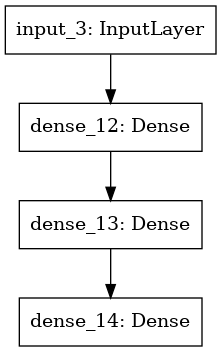

In [25]:
# plot the model
keras.utils.plot_model(model, "my_first_model.png")

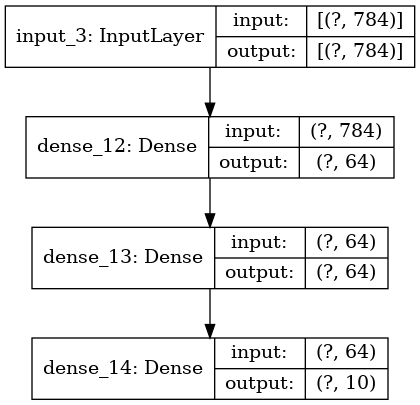

In [26]:
# optionally, display the input and output shapes of each layer in the plotted graph:

keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

## 훈련, 평가, 및 추론
---
- try to use Sequential() model, with MNIST dataset

In [27]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape, x_test.shape, x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000, 28, 28) (10000, 28, 28)


In [28]:
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)
history = model.fit(x_train, y_train, batch_size=100, epochs=2, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2
480/480 [==============================] - 1s 2ms/step - loss: 0.3807 - accuracy: 0.8920 - val_loss: 0.2151 - val_accuracy: 0.9362
Epoch 2/2
480/480 [==============================] - 1s 2ms/step - loss: 0.1769 - accuracy: 0.9479 - val_loss: 0.1487 - val_accuracy: 0.9580
313/313 - 0s - loss: 0.1404 - accuracy: 0.9582
Test loss: 0.1403622180223465
Test accuracy: 0.9581999778747559


- we can see that size(train)=60000*0.8=48000 (480 steps/epoch)
- and size(val) = 60000*0.2=12000 

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## 모델 저장
---

- There are two different types of saving models
  - Tensorflow SavedModel (recommended)
  - previous keras H5 (simplified version)
  - for more information: see https://www.tensorflow.org/guide/keras/save_and_serialize?hl=ko

In [30]:
# method 1: savedmodel type
model.save("path_to_my_model")
del model
# Recreate the exact same model purely from the file:
model = keras.models.load_model("path_to_my_model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: path_to_my_model/assets


In [31]:
# method 2: h5 type
model.save("my_model.h5")
del model
model = keras.models.load_model("my_model.h5")

## 다중 모델 정의
- a single graph of layers can be used to generate multiple models

In [32]:
encoder_input = keras.Input(shape=(28, 28, 1), name="img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x) 
            # (batch_size, rows, columns, channels)->(batch_size, channels)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d (Global (None, 16)                0   

### more information about de-convolution

--- 

- Convolutions
  - Convolutions
  - Dilated Convolutions (a.k.s Astrous Convolutions)
  - Transposed Convolutions (a.k.a. deconvolutions or fractionally strided convolutions)
  - Separable Convolutions
  - from https://towardsdatascience.com/types-of-convolutions-in-deep-learning-717013397f4d

- Difference between UpSample2D and Conv2DTranspose

  - UpSampling2D is just a simple scaling up of the image by using nearest neighbour or bilinear upsampling, so nothing smart. Advantage is it's cheap.
  - Conv2DTranspose is a convolution operation whose kernel is learnt (just like normal conv2d operation) while training your model. Using Conv2DTranspose will also upsample its input but the key difference is the model should learn what is the best upsampling for the job.
- transposed convolution
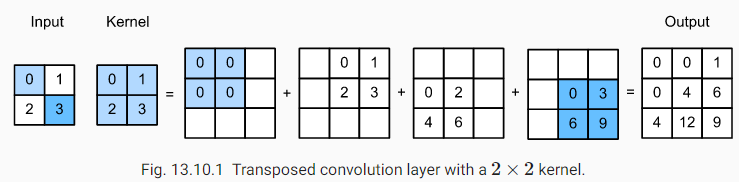

## 모든 모델은 계층처럼 호출 가능
---

In [33]:
encoder_input = keras.Input(shape=(28, 28, 1), name="original_img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)  # pool size equals to the size of the input 

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

decoder_input = keras.Input(shape=(16,), name="encoded_img")
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

decoder = keras.Model(decoder_input, decoder_output, name="decoder")
decoder.summary()

autoencoder_input = keras.Input(shape=(28, 28, 1), name="img")
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
original_img (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 16)                0   

### 다중 입출력이 있는 복잡한 모델

함수형 API 는 `순차형` API 가 처리할 수 없는 다중 입력 및 출력을 처리하기 쉽다.

예를 들면, 고객 불만 사항을 우선순위를 매겨 올바른 부서에 전달하는 시스템을 구축할 때 모델은 3개의 입력을 가질 수 있다:

- 게시글의 제목 (텍스트 입력)
- 게시글의 내용 (텍스트 입력)
- 고객이 붙인 태그 (범주형 입력)

모델은 2개의 출력을 가진다:

- 0과 1 사이의 우선순위 점수 (단일 시그모이드 출력)
- 사항을 전달할 부서 (소프트맥스 출력)

In [46]:
num_tags = 12  # Number of unique issue tags
num_words = 10000  # Size of vocabulary obtained when preprocessing text data
num_departments = 4  # Number of departments for predictions

title_input = keras.Input(
    shape=(None,), name="title"
)  # Variable-length sequence of ints
body_input = keras.Input(shape=(None,), name="body")  # Variable-length sequence of ints
tags_input = keras.Input(
    shape=(num_tags,), name="tags"
)  # Binary vectors of size `num_tags`

# Embed each word in the title into a 64-dimensional vector
title_features = layers.Embedding(num_words, 64)(title_input)
# Embed each word in the text into a 64-dimensional vector
body_features = layers.Embedding(num_words, 64)(body_input)

# Reduce sequence of embedded words in the title into a single 128-dimensional vector
title_features = layers.LSTM(128)(title_features)
# Reduce sequence of embedded words in the body into a single 32-dimensional vector
body_features = layers.LSTM(32)(body_features)

# Merge all available features into a single large vector via concatenation
x = layers.concatenate([title_features, body_features, tags_input])

# Stick a logistic regression for priority prediction on top of the features
priority_pred = layers.Dense(1, name="priority")(x)
# Stick a department classifier on top of the features
department_pred = layers.Dense(num_departments, name="department")(x)

# Instantiate an end-to-end model predicting both priority and department
model = keras.Model(
    inputs=[title_input, body_input, tags_input],
    outputs=[priority_pred, department_pred],
)

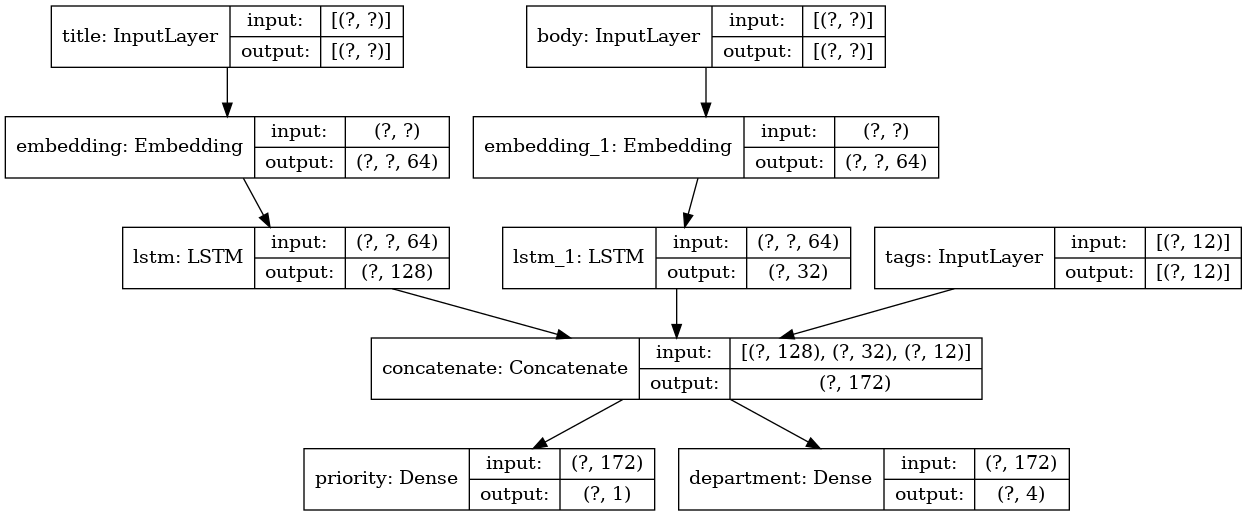

In [47]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

모델을 컴파일할 때 각 출력에 다른 손실함수를 적용할 수 있다.

In [48]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=[
        keras.losses.BinaryCrossentropy(from_logits=True),
        keras.losses.CategoricalCrossentropy(from_logits=True),
    ],
    loss_weights=[1.0, 0.2],
)

출력 계층은 다른 이름을 가질 수 있다.

In [49]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss={
        "priority": keras.losses.BinaryCrossentropy(from_logits=True),
        "department": keras.losses.CategoricalCrossentropy(from_logits=True),
    },
    loss_weights=[1.0, 0.2],
)

In [50]:
# Dummy input data
title_data = np.random.randint(num_words, size=(1280, 10))
body_data = np.random.randint(num_words, size=(1280, 100))
tags_data = np.random.randint(2, size=(1280, num_tags)).astype("float32")

# Dummy target data
priority_targets = np.random.random(size=(1280, 1))
dept_targets = np.random.randint(2, size=(1280, num_departments))

model.fit(
    {"title": title_data, "body": body_data, "tags": tags_data},
    {"priority": priority_targets, "department": dept_targets},
    epochs=2,
    batch_size=32,
)

Epoch 1/2
40/40 [==============================] - 0s 10ms/step - loss: 1.2996 - priority_loss: 0.7002 - department_loss: 2.9973
Epoch 2/2
40/40 [==============================] - 0s 10ms/step - loss: 1.3095 - priority_loss: 0.6994 - department_loss: 3.0501


# 서브클래싱 API

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2019/03/01<br>
**Last modified:** 2020/04/13<br>
**Description:** Complete guide to writing `Layer` and `Model` objects from scratch.

In [51]:
import tensorflow as tf
from tensorflow import keras

## `Layer` 클래스: 상태(가중치)와 연산 조합

케라스 `Layer` 클래스는 상태(계층의 "가중치")와 입력에서 출력으로의 변환("call", 계층의 전방향 연산)을 포함한다.
다음 완전연결계층은 상태: 변수 `w`와 `b`를 가진다.

In [52]:
class Linear(keras.layers.Layer):
    def __init__(self, units=32, input_dim=32):
        super(Linear, self).__init__()
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(
            initial_value=w_init(shape=(input_dim, units), dtype="float32"),
            trainable=True,
        )
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(
            initial_value=b_init(shape=(units,), dtype="float32"), trainable=True
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

In [53]:
x = tf.ones((2, 2))
linear_layer = Linear(4, 2)
y = linear_layer(x)
print(y)

tf.Tensor(
[[ 0.07581503 -0.02209497  0.02312595 -0.09028635]
 [ 0.07581503 -0.02209497  0.02312595 -0.09028635]], shape=(2, 4), dtype=float32)


In [54]:
assert linear_layer.weights == [linear_layer.w, linear_layer.b]

## `Model` 클래스

보통 내부 연산 블록을 정의할 때 `Layer` 클래스를 사용하고 외부 모델을 정의할 때 `Model` 클래스를 사용한다.

In [55]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) #표준 매개변수 처리
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

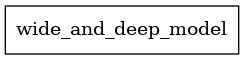

In [56]:
keras.utils.plot_model(model, "wide_and_deep_model.png", show_shapes=True)

In [59]:
x = tf.ones((2, 2, 2))
y = model(x)
print(y)

(<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[-0.5757799],
       [-0.5757799]], dtype=float32)>, <tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[-0.09716519],
       [-0.09716519]], dtype=float32)>)


## Backend operation
- keras is a model-level library, so does not have low-level operations, such as tensor products, convolutions, so on.
- It uses Backend library for low-level functions.

In [ ]:
!more $HOME/.keras/keras.json   # backend (for low level functions) is tensorflow
                                # among Tensorflow, Theano, CNTK

{
    "epsilon": 1e-07, 
    "floatx": "float32", 
    "image_data_format": "channels_last", 
    "backend": "tensorflow"
}


In [34]:
from tensorflow.keras import backend as K
a = K.constant([[-2,14],[-7,3]], dtype=tf.float32, shape=[2,2])
a

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-2., 14.],
       [-7.,  3.]], dtype=float32)>

In [35]:
np.random.normal(2, size=(2,2))

array([[3.62588441, 2.21753268],
       [1.4010376 , 1.97610141]])

In [36]:
val = np.random.normal((1, 10, 100))  # mean = 2, 2, 2 ( 3 samples)
var = K.variable(value=val)

var_0 = K.zeros(shape=(2, 2, 2))
var_1 = K.ones(shape=(2, 2, 2))
type(val), type(var), type(var_0), type(var_1)

(numpy.ndarray,
 tensorflow.python.ops.resource_variable_ops.ResourceVariable,
 tensorflow.python.ops.resource_variable_ops.ResourceVariable,
 tensorflow.python.ops.resource_variable_ops.ResourceVariable)

In [37]:
# Initializing Tensors with Random Numbers (same as tf.Variable)
b = K.random_uniform_variable(shape=(2,2), low=0, high=1) # Uniform distribution
c = K.random_normal_variable(shape=(2,2), mean=0, scale=1) # Gaussian distribution
print(b, '\n', c)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.346789  , 0.6621629 ],
       [0.31104958, 0.6457087 ]], dtype=float32)> 
 <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.34421808,  0.08714696],
       [ 0.6082787 ,  0.98639464]], dtype=float32)>


In [38]:
var1 = K.variable(tf.random.normal(shape=(2,2)))
var2 = tf.Variable(tf.random.normal(shape=(2,2)))
var1, var2

(<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
 array([[ 0.98667544,  1.3482274 ],
        [-0.8441225 ,  0.06912381]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
 array([[0.6663405 , 1.2770151 ],
        [0.7131987 , 0.71695757]], dtype=float32)>)

In [39]:
a, b, c

(<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[-2., 14.],
        [-7.,  3.]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
 array([[0.346789  , 0.6621629 ],
        [0.31104958, 0.6457087 ]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
 array([[-0.34421808,  0.08714696],
        [ 0.6082787 ,  0.98639464]], dtype=float32)>)

In [40]:
# Tensor Arithmetic
b + c * K.abs(a)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-0.34164715,  1.8822204 ],
       [ 4.5690002 ,  3.6048927 ]], dtype=float32)>

In [41]:
K.dot(a, K.transpose(b))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 8.576703  ,  8.417823  ],
       [-0.44103444, -0.24022114]], dtype=float32)>

In [42]:
K.sum(b, axis=1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.0089519 , 0.95675826], dtype=float32)>

In [43]:
K.softmax(b)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.42180356, 0.5781964 ],
       [0.41710743, 0.58289254]], dtype=float32)>

In [44]:
K.concatenate([b, c], axis=-1)

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[ 0.346789  ,  0.6621629 , -0.34421808,  0.08714696],
       [ 0.31104958,  0.6457087 ,  0.6082787 ,  0.98639464]],
      dtype=float32)>

In [45]:
K.prod(a, axis=1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-28., -21.], dtype=float32)>

In [ ]:
# K.shape(), K.ndim(), K.dtype(), K.eval(), K.xeros(), K.ones(),
# K.eye(), K.zeros_like(), K.ones_like(), K.cast(), K.update(),
# K.update_add(), K.update_sub(), K.dot(), K.batch_dot(), K.transpose(),
# K.{max(),min(), sum()}, K.cumsum(), K.cumprod(), K.std(), K.mean(), 
# any, all, argmax, argmin, square, abs, sqrt, exp, log, round, sign, pow,
# clip, equal, not_equal, greater, reshape, resize_images, ...

- For detailed information, please refer to https://keras.io/ko/backend/